# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
# Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
company=pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Random Forest\\Company_Data.csv")

In [4]:
company


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
company.shape

(400, 11)

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:xlabel='Sales', ylabel='Density'>

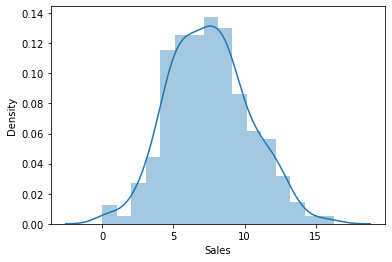

In [10]:
sns.distplot(company['Sales'])

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

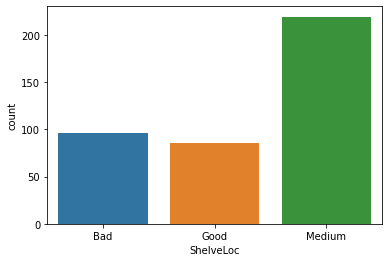

In [11]:
sns.countplot("ShelveLoc",data=company)

<AxesSubplot:xlabel='Urban', ylabel='count'>

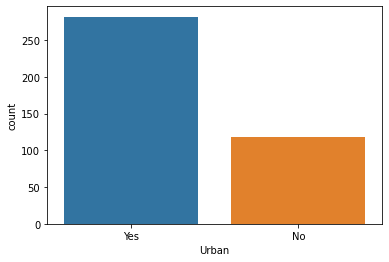

In [12]:
sns.countplot("Urban",data=company)

<AxesSubplot:xlabel='US', ylabel='count'>

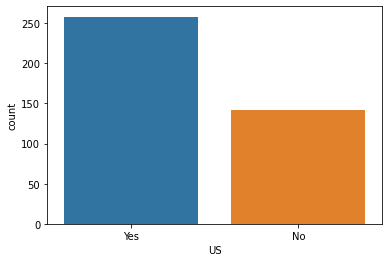

In [13]:
sns.countplot("US",data=company)

<AxesSubplot:xlabel='Advertising', ylabel='Sales'>

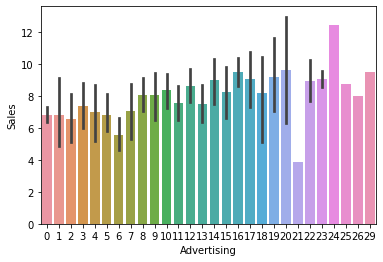

In [14]:
sns.barplot("Advertising","Sales",data=company)

In [15]:
company[company["Sales"]>=9.320000]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
380,9.64,106,64,10,17,89,Medium,68,17,Yes,Yes
383,9.35,98,117,0,76,68,Medium,63,10,Yes,No
384,12.85,123,37,15,348,112,Good,28,12,Yes,Yes
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes


In [16]:
company[company["Sales"]<=5.390000]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes
12,3.98,122,35,2,393,136,Medium,62,18,Yes,No
22,5.08,128,46,6,497,138,Medium,42,13,Yes,No
27,5.27,98,118,0,19,107,Medium,64,17,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
381,3.90,124,65,21,496,151,Bad,77,13,Yes,Yes
382,4.95,121,28,19,315,121,Medium,66,14,Yes,Yes
386,5.32,152,116,0,170,160,Medium,39,16,Yes,No
392,4.53,129,42,13,315,130,Bad,34,13,Yes,Yes


In [17]:
company[(company.Sales<5.390000)&(company.Sales<9.320000)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes
12,3.98,122,35,2,393,136,Medium,62,18,Yes,No
22,5.08,128,46,6,497,138,Medium,42,13,Yes,No
27,5.27,98,118,0,19,107,Medium,64,17,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
381,3.90,124,65,21,496,151,Bad,77,13,Yes,Yes
382,4.95,121,28,19,315,121,Medium,66,14,Yes,Yes
386,5.32,152,116,0,170,160,Medium,39,16,Yes,No
392,4.53,129,42,13,315,130,Bad,34,13,Yes,Yes


In [18]:
company['sales_category']=' '

In [19]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,


In [20]:
company.loc[company.Sales<=5.390000,'sales_category']='low'
company.loc[(company.Sales>5.390000)&(company.Sales<9.320000),'sales_category']='medium'
company.loc[company.Sales>=9.320000,'sales_category']='high'


In [21]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low


<AxesSubplot:xlabel='sales_category', ylabel='count'>

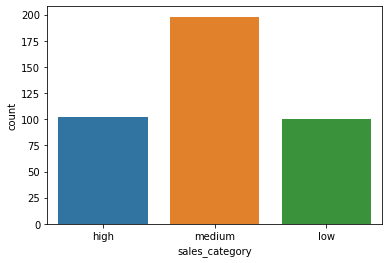

In [22]:
sns.countplot('sales_category',data=company)

In [23]:
company.sales_category.value_counts()

medium    198
high      102
low       100
Name: sales_category, dtype: int64

In [24]:
#converting categorical values into numeric
from sklearn.preprocessing import LabelEncoder

In [25]:
label=LabelEncoder()

In [26]:
company["ShelveLoc"]=label.fit_transform(company["ShelveLoc"])
company["Urban"]=label.fit_transform(company["Urban"])
company["US"]=label.fit_transform(company["US"])
company["sales_category"]=label.fit_transform(company["sales_category"])

In [27]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,2
397,7.41,162,26,12,368,159,2,40,18,1,1,2
398,5.94,100,79,7,284,95,0,50,12,1,1,2


In [29]:
#Train test split
from sklearn.model_selection import train_test_split

In [36]:
company.drop(columns='Sales',axis=1,inplace=True)

In [37]:
x=company.drop(columns=["sales_category"],axis=1)
y=company[["sales_category"]]

In [38]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [39]:
y

,sales_category
0,0
1,0
2,0
3,2
4,1
...,...
395,0
396,2
397,2
398,2


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [41]:
x_train.shape,y_train.shape

((320, 10), (320, 1))

In [42]:
x_test.shape,y_test.shape

((80, 10), (80, 1))

In [48]:
# Bagging

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=2000, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7075


In [49]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = AdaBoostClassifier(n_estimators=10, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.68


In [50]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_model=RandomForestClassifier(random_state=1)
rf_model.fit(x_train,y_train) 

RandomForestClassifier(random_state=1)

In [52]:
y_train_prd=rf_model.predict(x_train)

In [53]:
y_test_prd=rf_model.predict(x_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [55]:
accuracy_score(y_train,y_train_prd)

1.0

In [56]:
accuracy_score(y_test,y_test_prd)

0.6125

In [57]:
confusion_matrix(y_test,y_test_prd)

array([[ 9,  0,  6],
       [ 0,  8, 12],
       [ 4,  9, 32]], dtype=int64)

In [58]:
print(classification_report(y_test,y_test_prd))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.47      0.40      0.43        20
           2       0.64      0.71      0.67        45

    accuracy                           0.61        80
   macro avg       0.60      0.57      0.58        80
weighted avg       0.61      0.61      0.61        80



In [62]:
rf_model_cv = RandomForestClassifier(n_estimators=140,criterion="entropy",max_depth=8,random_state=5)

In [63]:
rf_model_cv.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=140,
                       random_state=5)

In [64]:
y_train_prd_cv=rf_model_cv.predict(x_train)

In [65]:
y_test_prd_cv=rf_model_cv.predict(x_test)

In [66]:
accuracy_score(y_test,y_test_prd_cv)

0.6375

In [67]:
accuracy_score(y_train,y_train_prd_cv)

0.990625

In [68]:
confusion_matrix(y_test,y_test_prd_cv)

array([[10,  0,  5],
       [ 0,  7, 13],
       [ 4,  7, 34]], dtype=int64)

In [69]:
print(classification_report(y_test,y_test_prd_cv))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.50      0.35      0.41        20
           2       0.65      0.76      0.70        45

    accuracy                           0.64        80
   macro avg       0.62      0.59      0.60        80
weighted avg       0.63      0.64      0.63        80

